In [1]:
# Imports
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safe_makedir(path):
    """Makes a directory, or returns if the directory
    already exists.

    Taken from:
    https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory-in-python
    """
    try:
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise

In [73]:
# Load Average Quantitative Data
# Do for both DORN and DenseDepth
# CNN, CNN+Median, CNN+GT Hist Matching, Our Method
models = ["dorn", "densedepth"]
conditions = [
    ("CNN", "../{0}/results/{0}_test"),
    ("CNN + median rescaling", "../median_matching/results/{0}_median_test"),
    ("CNN + GT histogram matching", "../gt_hist_matching/results/{0}_gt_hist_test")
]
whm_conditions = [
#     ("CNN + WHM intensity only (SBR=infinite)",
#         {"use_intensity": True,
#          "use_squared_falloff": False,
#          "dc_count": 0.0,
#          "use_jitter": False,
#          "use_poisson": False}),
    ("Proposed (SBR=10)",
        {"use_intensity": True,
         "use_squared_falloff": True,
         "lambertian": False,
         "dc_count": 1e5,
         "use_jitter": True,
         "use_poisson": True}),
    ("Proposed (SBR=50)",
        {"use_intensity": True,
         "use_squared_falloff": True,
         "lambertian": False,
         "dc_count": 2e4,
         "use_jitter": True,
         "use_poisson": True}),
    ("Proposed (SBR=100)",
        {"use_intensity": True,
         "use_squared_falloff": True,
         "lambertian": False,
         "dc_count": 1e4,
         "use_jitter": True,
         "use_poisson": True})
]
metric_list = ["delta1", "delta2", "delta3", "rel_abs_diff", "rmse", "log10",]
row_index = pd.MultiIndex.from_product([models, [a[0] for a in conditions] + [a[0] for a in whm_conditions]],
                                       names=["model", "hyperparams"])
col_index = pd.Index(metric_list)
avg_table = pd.DataFrame(index=row_index, columns=col_index)

for model in models:
    for condition, template in conditions:
        hyper_string = template.format(model)
        data = pd.read_csv(hyper_string + "_avg_metrics.csv", index_col=0)
#         print(data.index)
#         print(table.index)
        for metric in metric_list:
#             print(data.loc[metric])
#             print(table.loc[model, condition][metric])
            avg_table.at[(model, condition), metric] = data.loc[metric, '0']
        
    for condition, hparams in whm_conditions:
        file = "{}_test_int_{}_fall_{}_lamb_{}_dc_{}_jit_{}_poiss_{}_avg_metrics.csv".format(
            model,
            hparams["use_intensity"],
            hparams["use_squared_falloff"],
            hparams["lambertian"],
            hparams["dc_count"],
            hparams["use_jitter"],
            hparams["use_poisson"]
        )
        file = os.path.join("results", file)
        data = pd.read_csv(file, index_col=0)
        for metric in metric_list:
            avg_table.at[(model, condition), metric] = data.loc[metric,'0']


# MiDaS
# GT hist matching and Proposed methods only
model = "midas"
condition, template = ("CNN + GT histogram matching", "../gt_hist_matching/results/{0}_gt_hist_test")
hyper_string = template.format(model)
data = pd.read_csv(hyper_string + "_avg_metrics.csv", index_col=0)
for metric in metric_list:
    avg_table.at[(model, condition), metric] = data.loc[metric, '0']
for condition, hparams in whm_conditions:
    file = "{}_test_int_{}_fall_{}_lamb_{}_dc_{}_jit_{}_poiss_{}_avg_metrics.csv".format(
        model,
        hparams["use_intensity"],
        hparams["use_squared_falloff"],
        hparams["lambertian"],
        hparams["dc_count"],
        hparams["use_jitter"],
        hparams["use_poisson"]
    )
    file = os.path.join("results", file)
    data = pd.read_csv(file, index_col=0)
    for metric in metric_list:
        avg_table.at[(model, condition), metric] = data.loc[metric,'0']
avg_table = avg_table.astype(float).round(3)

avg_table

delta1  delta2  delta3  rel_abs_diff  \
model      hyperparams                                                         
dorn       CNN                           0.846   0.954   0.983         0.120   
           CNN + median rescaling        0.871   0.964   0.988         0.111   
           CNN + GT histogram matching   0.906   0.972   0.990         0.095   
           Proposed (SBR=10)             0.905   0.971   0.990         0.090   
           Proposed (SBR=50)             0.906   0.971   0.990         0.089   
           Proposed (SBR=100)            0.907   0.971   0.990         0.089   
densedepth CNN                           0.847   0.973   0.994         0.123   
           CNN + median rescaling        0.888   0.978   0.995         0.106   
           CNN + GT histogram matching   0.930   0.984   0.995         0.079   
           Proposed (SBR=10)             0.924   0.982   0.995         0.082   
           Proposed (SBR=50)             0.925   0.983   0.995         0.081   
           Proposed (SBR=100)            0.926   0.983   0.995         0.081   
midas      CNN + GT histogram matching   0.801   0.943   0.982         0.149   
           Proposed (SBR=10)             0.793   0.937   0.979         0.152   
           Proposed (SBR=50)             0.794   0.938   0.979         0.151   
           Proposed (SBR=100)            0.794   0.938   0.979         0.151   

                                         rmse  log10  
model      hyperparams                                
dorn       CNN                          0.501  0.053  
           CNN + median rescaling       0.473  0.048  
           CNN + GT histogram matching  0.419  0.040  
           Proposed (SBR=10)            0.413  0.039  
           Proposed (SBR=50)            0.408  0.039  
           Proposed (SBR=100)           0.408  0.039  
densedepth CNN                          0.461  0.053  
           CNN + median rescaling       0.409  0.045  
           CNN + GT histogram matching  0.338  0.034  
           Proposed (SBR=10)            0.352  0.035  
           Proposed (SBR=50)            0.347  0.035  
           Proposed (SBR=100)           0.346  0.035  
midas      CNN + GT histogram matching  0.558  0.062  
           Proposed (SBR=10)            0.572  0.064  
           Proposed (SBR=50)            0.570  0.063  
           Proposed (SBR=100)           0.570  0.064

In [74]:
def bold_best(table, model, metric, higher_is_better=True):
    s = pd.to_numeric(table.loc[(model, slice(None)), metric])
    s_sorted = s.sort_values(ascending=higher_is_better).drop_duplicates()
    if len(s_sorted) == 1:
        v_best = s_sorted[0]
        v_second_best = s_sorted[0]
    else:
        v_second_best, v_best = s_sorted[-2:]
    t_best = "\\textbf{{{:0.3f}}}".format(v_best)
    t_second_best = "\\underline{{{:0.3f}}}".format(v_second_best)
    for i in s.index:
        print(s)
        if s[i] == v_best:
            table.loc[i, metric] = t_best
        elif s[i] == v_second_best:
            table.loc[i, metric] = t_second_best
#     table.loc[second_best, metric] = t_second_best
    return table

for metric in metric_list:
    for model in ["densedepth", "dorn", "midas"]:
        hib = "delta" in metric
        avg_table = bold_best(avg_table, model, metric, higher_is_better=hib)
avg_table

model       hyperparams                
densedepth  CNN                            0.847
            CNN + median rescaling         0.888
            CNN + GT histogram matching    0.930
            Proposed (SBR=10)              0.924
            Proposed (SBR=50)              0.925
            Proposed (SBR=100)             0.926
Name: delta1, dtype: float64
model       hyperparams                
densedepth  CNN                            0.847
            CNN + median rescaling         0.888
            CNN + GT histogram matching    0.930
            Proposed (SBR=10)              0.924
            Proposed (SBR=50)              0.925
            Proposed (SBR=100)             0.926
Name: delta1, dtype: float64
model       hyperparams                
densedepth  CNN                            0.847
            CNN + median rescaling         0.888
            CNN + GT histogram matching    0.930
            Proposed (SBR=10)              0.924
            Proposed (SBR=50)         

model  hyperparams                
midas  CNN + GT histogram matching    0.558
       Proposed (SBR=10)              0.572
       Proposed (SBR=50)              0.570
       Proposed (SBR=100)             0.570
Name: rmse, dtype: float64
model  hyperparams                
midas  CNN + GT histogram matching    0.558
       Proposed (SBR=10)              0.572
       Proposed (SBR=50)              0.570
       Proposed (SBR=100)             0.570
Name: rmse, dtype: float64
model  hyperparams                
midas  CNN + GT histogram matching    0.558
       Proposed (SBR=10)              0.572
       Proposed (SBR=50)              0.570
       Proposed (SBR=100)             0.570
Name: rmse, dtype: float64
model  hyperparams                
midas  CNN + GT histogram matching    0.558
       Proposed (SBR=10)              0.572
       Proposed (SBR=50)              0.570
       Proposed (SBR=100)             0.570
Name: rmse, dtype: float64
model       hyperparams                
densedep

delta1             delta2  \
model      hyperparams                                                         
dorn       CNN                                      0.846              0.954   
           CNN + median rescaling                   0.871              0.964   
           CNN + GT histogram matching  \underline{0.906}     \textbf{0.972}   
           Proposed (SBR=10)                        0.905  \underline{0.971}   
           Proposed (SBR=50)            \underline{0.906}  \underline{0.971}   
           Proposed (SBR=100)              \textbf{0.907}  \underline{0.971}   
densedepth CNN                                      0.847              0.973   
           CNN + median rescaling                   0.888              0.978   
           CNN + GT histogram matching     \textbf{0.930}     \textbf{0.984}   
           Proposed (SBR=10)                        0.924              0.982   
           Proposed (SBR=50)                        0.925  \underline{0.983}   
           Proposed (SBR=100)           \underline{0.926}  \underline{0.983}   
midas      CNN + GT histogram matching     \textbf{0.801}     \textbf{0.943}   
           Proposed (SBR=10)                        0.793              0.937   
           Proposed (SBR=50)            \underline{0.794}  \underline{0.938}   
           Proposed (SBR=100)           \underline{0.794}  \underline{0.938}   

                                                   delta3       rel_abs_diff  \
model      hyperparams                                                         
dorn       CNN                                      0.983               0.12   
           CNN + median rescaling       \underline{0.988}              0.111   
           CNN + GT histogram matching     \textbf{0.990}              0.095   
           Proposed (SBR=10)               \textbf{0.990}  \underline{0.090}   
           Proposed (SBR=50)               \textbf{0.990}     \textbf{0.089}   
           Proposed (SBR=100)              \textbf{0.990}     \textbf{0.089}   
densedepth CNN                          \underline{0.994}              0.123   
           CNN + median rescaling          \textbf{0.995}              0.106   
           CNN + GT histogram matching     \textbf{0.995}     \textbf{0.079}   
           Proposed (SBR=10)               \textbf{0.995}              0.082   
           Proposed (SBR=50)               \textbf{0.995}  \underline{0.081}   
           Proposed (SBR=100)              \textbf{0.995}  \underline{0.081}   
midas      CNN + GT histogram matching     \textbf{0.982}     \textbf{0.149}   
           Proposed (SBR=10)            \underline{0.979}              0.152   
           Proposed (SBR=50)            \underline{0.979}  \underline{0.151}   
           Proposed (SBR=100)           \underline{0.979}  \underline{0.151}   

                                                     rmse              log10  
model      hyperparams                                                        
dorn       CNN                                      0.501              0.053  
           CNN + median rescaling                   0.473              0.048  
           CNN + GT histogram matching              0.419  \underline{0.040}  
           Proposed (SBR=10)            \underline{0.413}     \textbf{0.039}  
           Proposed (SBR=50)               \textbf{0.408}     \textbf{0.039}  
           Proposed (SBR=100)              \textbf{0.408}     \textbf{0.039}  
densedepth CNN                                      0.461              0.053  
           CNN + median rescaling                   0.409              0.045  
           CNN + GT histogram matching     \textbf{0.338}     \textbf{0.034}  
           Proposed (SBR=10)                        0.352  \underline{0.035}  
           Proposed (SBR=50)                        0.347  \underline{0.035}  
           Proposed (SBR=100)           \underline{0.346}  \underline{0.035}  
midas      CNN + GT histogram matching     \textbf{0.558}     \

In [75]:
# Clean up formatting
formatted_avg_table = avg_table.copy()
# dorn -> DORN
# densedepth -> DenseDepth
formatted_avg_table.index.set_levels(["DenseDepth", "DORN", "MiDaS"], level=0, inplace=True)
formatted_avg_table.index = [cond.replace("CNN", net) for net, cond in formatted_avg_table.index.values]
# LaTeX formatting for columns
formatted_avg_table.rename(columns={
    "delta1": r"$\delta^1 \uparrow$",
    "delta2": r"$\delta^2 \uparrow$",
    "delta3": r"$\delta^3 \uparrow$",
    "rel_abs_diff": r"$rel \downarrow$",
    "rmse": r"$rmse \downarrow$",
    "log10": r"$log10 \downarrow$"}, inplace=True)

formatted_avg_table

,$\delta^1 \uparrow$,$\delta^2 \uparrow$,$\delta^3 \uparrow$,$rel \downarrow$,$rmse \downarrow$,$log10 \downarrow$
DORN,0.846,0.954,0.983,0.12,0.501,0.053
DORN + median rescaling,0.871,0.964,\underline{0.988},0.111,0.473,0.048
DORN + GT histogram matching,\underline{0.906},\textbf{0.972},\textbf{0.990},0.095,0.419,\underline{0.040}
Proposed (SBR=10),0.905,\underline{0.971},\textbf{0.990},\underline{0.090},\underline{0.413},\textbf{0.039}
Proposed (SBR=50),\underline{0.906},\underline{0.971},\textbf{0.990},\textbf{0.089},\textbf{0.408},\textbf{0.039}
Proposed (SBR=100),\textbf{0.907},\underline{0.971},\textbf{0.990},\textbf{0.089},\textbf{0.408},\textbf{0.039}
DenseDepth,0.847,0.973,\underline{0.994},0.123,0.461,0.053
DenseDepth + median rescaling,0.888,0.978,\textbf{0.995},0.106,0.409,0.045
DenseDepth + GT histogram matching,\textbf{0.930},\textbf{0.984},\textbf{0.995},\textbf{0.079},\textbf{0.338},\textbf{0.034}
Proposed (SBR=10),0.924,0.982,\textbf{0.995},0.082,0.352,\underline{0.035}


In [76]:
# Write Table
# with pd.option_context('display.float_format', '{:0.3f}'.format):
with open("figures/sim_table.tex", 'w') as f:
    table_string = formatted_avg_table.to_latex(
#         header=[r"$\delta^1 \uparrow$", r"$\delta^2 \uparrow$", r"$\delta^3 \uparrow$",
#                                               r"rel $\downarrow$", r"rmse $\downarrow$", r"$log10 \downarrow$"],
                                      float_format="{:0.3f}".format,
                                      escape=False,
                                      multirow=True,
                                      column_format="lrrr|rrr")
    # Add midrule
    table_string_list = table_string.splitlines()
    table_string_list.insert(10, "\midrule")
    table_string_list.insert(17, "\midrule")
    table_string = '\n'.join(table_string_list)
    print(table_string)
    f.write(table_string)


\begin{tabular}{lrrr|rrr}
\toprule
{} & $\delta^1 \uparrow$ & $\delta^2 \uparrow$ & $\delta^3 \uparrow$ &   $rel \downarrow$ &  $rmse \downarrow$ & $log10 \downarrow$ \\
\midrule
DORN                               &               0.846 &               0.954 &               0.983 &              0.120 &              0.501 &              0.053 \\
DORN + median rescaling            &               0.871 &               0.964 &   \underline{0.988} &              0.111 &              0.473 &              0.048 \\
DORN + GT histogram matching       &   \underline{0.906} &      \textbf{0.972} &      \textbf{0.990} &              0.095 &              0.419 &  \underline{0.040} \\
Proposed (SBR=10)                  &               0.905 &   \underline{0.971} &      \textbf{0.990} &  \underline{0.090} &  \underline{0.413} &     \textbf{0.039} \\
Proposed (SBR=50)                  &   \underline{0.906} &   \underline{0.971} &      \textbf{0.990} &     \textbf{0.089} &     \textbf{0.408} &     \tex

In [77]:
# Load Qualitative Data

# Load the images
from nyuv2_labeled_dataset import cfg, load_data
data_config = cfg()
del data_config["data_name"]
dataset = load_data(channels_first=False, dataset_type="test", **data_config)


# Find best images
N = 654  # Number of entries in the dataset
entry_list = range(N)
metric_list = ["delta1", "delta2", "delta3", "rel_abs_diff", "rmse", "log10",]
models = ["dorn", "densedepth", "midas"]
row_index = pd.MultiIndex.from_product([models, [a[0] for a in conditions] + [a[0] for a in whm_conditions]],
                                       names=["model", "hyperparams"])
col_index = pd.MultiIndex.from_product([entry_list, metric_list],
                                       names=["entry", "metric"])
table = pd.DataFrame(index=row_index, columns=col_index)
# print(table)
print(table.index)
images = {}
for model in models:
    for condition, template in conditions:
        hyper_string = template.format(model)
        data = pd.read_pickle(hyper_string + "_metrics.pkl")
        images[(model, condition)] = np.load(hyper_string + "_outputs.npy")
        for metric in metric_list:
            for entry in entry_list:
                table.loc[model, condition][entry, metric] = data[metric][entry]
#         print(data.index)
#         print(table.index)
#         for entry in entry_list:
#             print(data.loc[metric])
#             print(table.loc[model, condition][metric])
#             table.at[(model, condition), metric] = data.loc[metric, '0']
        
    for condition, hparams in whm_conditions:
        hyper_string = "{}_test_int_{}_fall_{}_lamb_{}_dc_{}_jit_{}_poiss_{}".format(
            model,
            hparams["use_intensity"],
            hparams["use_squared_falloff"],
            hparams["lambertian"],
            hparams["dc_count"],
            hparams["use_jitter"],
            hparams["use_poisson"]
        )
        file = os.path.join("results", hyper_string + "_metrics.pkl")
        data = pd.read_pickle(file)
        images[(model, condition)] = np.load(os.path.join("results", hyper_string + "_outputs.npy"))
        for metric in metric_list:
            for entry in entry_list:
                table.loc[model, condition][entry, metric] = data[metric][entry]


MultiIndex(levels=[['densedepth', 'dorn', 'midas'], ['CNN', 'CNN + GT histogram matching', 'CNN + median rescaling', 'Proposed (SBR=10)', 'Proposed (SBR=100)', 'Proposed (SBR=50)']],
           codes=[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2], [0, 2, 1, 3, 5, 4, 0, 2, 1, 3, 5, 4, 0, 2, 1, 3, 5, 4]],
           names=['model', 'hyperparams'])


In [78]:
# Use quantitative data to find best examples of our method working
# Maximize differences between rmse of unrescaled version and SBR=100 version

df1 = table.loc[(slice(None), "CNN"),(slice(None),"rmse")].values
df2 = table.loc[(slice(None), "Proposed (SBR=100)"), (slice(None), "rmse")].values
k = 5
topk = np.argsort(df1 - df2, axis=1)[:,-k:]
print(topk)
# print(table.loc[("dorn", "CNN"),(88,"rmse")])
# print(table.loc[("dorn", "CNN + WHM (SBR=100)"), (, "rmse")])

[[428 358 427 178  88]
 [527 548 346 600 107]
 [551 616 134 587 631]]


In [79]:
# Parula colormap
from matplotlib.colors import LinearSegmentedColormap
from numpy import nan, inf

# Used to reconstruct the colormap in viscm
parameters = {'xp': [8.6840042204210732, -21.378780072752193, -13.715204596193757, -94.858944936224646, 53.679179741776352, -9.6],
              'yp': [-36.497267048261136, -44.616177228232843, 10.381246780010315, 84.763008758371967, 6.324059763008762, 41],
              'min_JK': 25.4069767442,
              'max_JK': 95}

cm_data = [[ 0.26710521,  0.03311059,  0.6188155 ],
       [ 0.26493929,  0.04780926,  0.62261795],
       [ 0.26260545,  0.06084214,  0.62619176],
       [ 0.26009691,  0.07264411,  0.62951561],
       [ 0.25740785,  0.08360391,  0.63256745],
       [ 0.25453369,  0.09395358,  0.63532497],
       [ 0.25147146,  0.10384228,  0.6377661 ],
       [ 0.24822014,  0.11337029,  0.6398697 ],
       [ 0.24478105,  0.12260661,  0.64161629],
       [ 0.24115816,  0.131599  ,  0.6429888 ],
       [ 0.23735836,  0.14038009,  0.64397346],
       [ 0.23339166,  0.14897137,  0.64456048],
       [ 0.22927127,  0.15738602,  0.64474476],
       [ 0.22501278,  0.16563165,  0.64452595],
       [ 0.22063349,  0.17371215,  0.64390834],
       [ 0.21616055,  0.18162302,  0.64290515],
       [ 0.21161851,  0.18936156,  0.64153295],
       [ 0.20703353,  0.19692415,  0.63981287],
       [ 0.20243273,  0.20430706,  0.63776986],
       [ 0.19784363,  0.211507  ,  0.63543183],
       [ 0.19329361,  0.21852157,  0.63282872],
       [ 0.18880937,  0.2253495 ,  0.62999156],
       [ 0.18442119,  0.23198815,  0.62695569],
       [ 0.18014936,  0.23844124,  0.62374886],
       [ 0.17601569,  0.24471172,  0.62040016],
       [ 0.17204028,  0.25080356,  0.61693715],
       [ 0.16824123,  0.25672163,  0.6133854 ],
       [ 0.16463462,  0.26247158,  0.60976836],
       [ 0.16123449,  0.26805963,  0.60610723],
       [ 0.15805279,  0.27349243,  0.60242099],
       [ 0.15509948,  0.27877688,  0.59872645],
       [ 0.15238249,  0.28392004,  0.59503836],
       [ 0.14990781,  0.28892902,  0.59136956],
       [ 0.14767951,  0.29381086,  0.58773113],
       [ 0.14569979,  0.29857245,  0.58413255],
       [ 0.1439691 ,  0.30322055,  0.58058191],
       [ 0.14248613,  0.30776167,  0.57708599],
       [ 0.14124797,  0.31220208,  0.57365049],
       [ 0.14025018,  0.31654779,  0.57028011],
       [ 0.13948691,  0.32080454,  0.5669787 ],
       [ 0.13895174,  0.32497744,  0.56375063],
       [ 0.13863958,  0.32907012,  0.56060453],
       [ 0.138537  ,  0.3330895 ,  0.55753513],
       [ 0.13863384,  0.33704026,  0.55454374],
       [ 0.13891931,  0.34092684,  0.55163126],
       [ 0.13938212,  0.34475344,  0.54879827],
       [ 0.14001061,  0.34852402,  0.54604503],
       [ 0.14079292,  0.35224233,  0.54337156],
       [ 0.14172091,  0.35590982,  0.54078769],
       [ 0.14277848,  0.35953205,  0.53828312],
       [ 0.14395358,  0.36311234,  0.53585661],
       [ 0.1452346 ,  0.36665374,  0.5335074 ],
       [ 0.14661019,  0.3701591 ,  0.5312346 ],
       [ 0.14807104,  0.37363011,  0.52904278],
       [ 0.1496059 ,  0.3770697 ,  0.52692951],
       [ 0.15120289,  0.3804813 ,  0.52488853],
       [ 0.15285214,  0.38386729,  0.52291854],
       [ 0.15454421,  0.38722991,  0.52101815],
       [ 0.15627225,  0.39056998,  0.5191937 ],
       [ 0.15802555,  0.39389087,  0.5174364 ],
       [ 0.15979549,  0.39719482,  0.51574311],
       [ 0.16157425,  0.40048375,  0.51411214],
       [ 0.16335571,  0.40375871,  0.51254622],
       [ 0.16513234,  0.40702178,  0.51104174],
       [ 0.1668964 ,  0.41027528,  0.50959299],
       [ 0.16864151,  0.41352084,  0.50819797],
       [ 0.17036277,  0.41675941,  0.50685814],
       [ 0.1720542 ,  0.41999269,  0.50557008],
       [ 0.17370932,  0.42322271,  0.50432818],
       [ 0.17532301,  0.42645082,  0.50313007],
       [ 0.17689176,  0.42967776,  0.50197686],
       [ 0.17841013,  0.43290523,  0.5008633 ],
       [ 0.17987314,  0.43613477,  0.49978492],
       [ 0.18127676,  0.43936752,  0.49873901],
       [ 0.18261885,  0.44260392,  0.49772638],
       [ 0.18389409,  0.44584578,  0.49673978],
       [ 0.18509911,  0.44909409,  0.49577605],
       [ 0.18623135,  0.4523496 ,  0.494833  ],
       [ 0.18728844,  0.45561305,  0.49390803],
       [ 0.18826671,  0.45888565,  0.49299567],
       [ 0.18916393,  0.46216809,  0.49209268],
       [ 0.18997879,  0.46546084,  0.49119678],
       [ 0.19070881,  0.46876472,  0.49030328],
       [ 0.19135221,  0.47208035,  0.48940827],
       [ 0.19190791,  0.47540815,  0.48850845],
       [ 0.19237491,  0.47874852,  0.4876002 ],
       [ 0.19275204,  0.48210192,  0.48667935],
       [ 0.19303899,  0.48546858,  0.48574251],
       [ 0.19323526,  0.48884877,  0.48478573],
       [ 0.19334062,  0.49224271,  0.48380506],
       [ 0.19335574,  0.49565037,  0.4827974 ],
       [ 0.19328143,  0.49907173,  0.48175948],
       [ 0.19311664,  0.50250719,  0.48068559],
       [ 0.192864  ,  0.50595628,  0.47957408],
       [ 0.19252521,  0.50941877,  0.47842186],
       [ 0.19210087,  0.51289469,  0.47722441],
       [ 0.19159194,  0.516384  ,  0.47597744],
       [ 0.19100267,  0.51988593,  0.47467988],
       [ 0.19033595,  0.52340005,  0.47332894],
       [ 0.18959113,  0.5269267 ,  0.47191795],
       [ 0.18877336,  0.530465  ,  0.47044603],
       [ 0.18788765,  0.53401416,  0.46891178],
       [ 0.18693822,  0.53757359,  0.46731272],
       [ 0.18592276,  0.54114404,  0.46563962],
       [ 0.18485204,  0.54472367,  0.46389595],
       [ 0.18373148,  0.5483118 ,  0.46207951],
       [ 0.18256585,  0.55190791,  0.4601871 ],
       [ 0.18135481,  0.55551253,  0.45821002],
       [ 0.18011172,  0.55912361,  0.45615277],
       [ 0.17884392,  0.56274038,  0.45401341],
       [ 0.17755858,  0.56636217,  0.45178933],
       [ 0.17625543,  0.56998972,  0.44946971],
       [ 0.174952  ,  0.57362064,  0.44706119],
       [ 0.17365805,  0.57725408,  0.44456198],
       [ 0.17238403,  0.58088916,  0.4419703 ],
       [ 0.17113321,  0.58452637,  0.43927576],
       [ 0.1699221 ,  0.58816399,  0.43648119],
       [ 0.1687662 ,  0.5918006 ,  0.43358772],
       [ 0.16767908,  0.59543526,  0.43059358],
       [ 0.16667511,  0.59906699,  0.42749697],
       [ 0.16575939,  0.60269653,  0.42428344],
       [ 0.16495764,  0.6063212 ,  0.42096245],
       [ 0.16428695,  0.60993988,  0.41753246],
       [ 0.16376481,  0.61355147,  0.41399151],
       [ 0.16340924,  0.61715487,  0.41033757],
       [ 0.16323549,  0.62074951,  0.40656329],
       [ 0.16326148,  0.62433443,  0.40266378],
       [ 0.16351136,  0.62790748,  0.39864431],
       [ 0.16400433,  0.63146734,  0.39450263],
       [ 0.16475937,  0.63501264,  0.39023638],
       [ 0.16579502,  0.63854196,  0.38584309],
       [ 0.16712921,  0.64205381,  0.38132023],
       [ 0.168779  ,  0.64554661,  0.37666513],
       [ 0.17075915,  0.64901912,  0.37186962],
       [ 0.17308572,  0.65246934,  0.36693299],
       [ 0.1757732 ,  0.65589512,  0.36185643],
       [ 0.17883344,  0.65929449,  0.3566372 ],
       [ 0.18227669,  0.66266536,  0.35127251],
       [ 0.18611159,  0.66600553,  0.34575959],
       [ 0.19034516,  0.66931265,  0.34009571],
       [ 0.19498285,  0.67258423,  0.3342782 ],
       [ 0.20002863,  0.67581761,  0.32830456],
       [ 0.20548509,  0.67900997,  0.3221725 ],
       [ 0.21135348,  0.68215834,  0.31587999],
       [ 0.2176339 ,  0.68525954,  0.30942543],
       [ 0.22432532,  0.68831023,  0.30280771],
       [ 0.23142568,  0.69130688,  0.29602636],
       [ 0.23893914,  0.69424565,  0.28906643],
       [ 0.2468574 ,  0.69712255,  0.28194103],
       [ 0.25517514,  0.69993351,  0.27465372],
       [ 0.26388625,  0.70267437,  0.26720869],
       [ 0.27298333,  0.70534087,  0.25961196],
       [ 0.28246016,  0.70792854,  0.25186761],
       [ 0.29232159,  0.71043184,  0.2439642 ],
       [ 0.30253943,  0.71284765,  0.23594089],
       [ 0.31309875,  0.71517209,  0.22781515],
       [ 0.32399522,  0.71740028,  0.21959115],
       [ 0.33520729,  0.71952906,  0.21129816],
       [ 0.3467003 ,  0.72155723,  0.20298257],
       [ 0.35846225,  0.72348143,  0.19466318],
       [ 0.3704552 ,  0.72530195,  0.18639333],
       [ 0.38264126,  0.72702007,  0.17822762],
       [ 0.39499483,  0.72863609,  0.17020921],
       [ 0.40746591,  0.73015499,  0.1624122 ],
       [ 0.42001969,  0.73158058,  0.15489659],
       [ 0.43261504,  0.73291878,  0.14773267],
       [ 0.44521378,  0.73417623,  0.14099043],
       [ 0.45777768,  0.73536072,  0.13474173],
       [ 0.47028295,  0.73647823,  0.1290455 ],
       [ 0.48268544,  0.73753985,  0.12397794],
       [ 0.49497773,  0.73854983,  0.11957878],
       [ 0.5071369 ,  0.73951621,  0.11589589],
       [ 0.51913764,  0.74044827,  0.11296861],
       [ 0.53098624,  0.74134823,  0.11080237],
       [ 0.5426701 ,  0.74222288,  0.10940411],
       [ 0.55417235,  0.74308049,  0.10876749],
       [ 0.56550904,  0.74392086,  0.10885609],
       [ 0.57667994,  0.74474781,  0.10963233],
       [ 0.58767906,  0.74556676,  0.11105089],
       [ 0.59850723,  0.74638125,  0.1130567 ],
       [ 0.609179  ,  0.74719067,  0.11558918],
       [ 0.61969877,  0.74799703,  0.11859042],
       [ 0.63007148,  0.74880206,  0.12200388],
       [ 0.64030249,  0.74960714,  0.12577596],
       [ 0.65038997,  0.75041586,  0.12985641],
       [ 0.66034774,  0.75122659,  0.1342004 ],
       [ 0.67018264,  0.75203968,  0.13876817],
       [ 0.67990043,  0.75285567,  0.14352456],
       [ 0.68950682,  0.75367492,  0.14843886],
       [ 0.69900745,  0.75449768,  0.15348445],
       [ 0.70840781,  0.75532408,  0.15863839],
       [ 0.71771325,  0.75615416,  0.16388098],
       [ 0.72692898,  0.75698787,  0.1691954 ],
       [ 0.73606001,  0.75782508,  0.17456729],
       [ 0.74511119,  0.75866562,  0.17998443],
       [ 0.75408719,  0.75950924,  0.18543644],
       [ 0.76299247,  0.76035568,  0.19091446],
       [ 0.77183123,  0.76120466,  0.19641095],
       [ 0.78060815,  0.76205561,  0.20191973],
       [ 0.78932717,  0.76290815,  0.20743538],
       [ 0.79799213,  0.76376186,  0.21295324],
       [ 0.8066067 ,  0.76461631,  0.21846931],
       [ 0.81517444,  0.76547101,  0.22398014],
       [ 0.82369877,  0.76632547,  0.2294827 ],
       [ 0.832183  ,  0.7671792 ,  0.2349743 ],
       [ 0.8406303 ,  0.76803167,  0.24045248],
       [ 0.84904371,  0.76888236,  0.24591492],
       [ 0.85742615,  0.76973076,  0.25135935],
       [ 0.86578037,  0.77057636,  0.25678342],
       [ 0.87410891,  0.77141875,  0.2621846 ],
       [ 0.88241406,  0.77225757,  0.26755999],
       [ 0.89070781,  0.77308772,  0.27291122],
       [ 0.89898836,  0.77391069,  0.27823228],
       [ 0.90725475,  0.77472764,  0.28351668],
       [ 0.91550775,  0.77553893,  0.28875751],
       [ 0.92375722,  0.7763404 ,  0.29395046],
       [ 0.9320227 ,  0.77712286,  0.29909267],
       [ 0.94027715,  0.7779011 ,  0.30415428],
       [ 0.94856742,  0.77865213,  0.3091325 ],
       [ 0.95686038,  0.7793949 ,  0.31397459],
       [ 0.965222  ,  0.7800975 ,  0.31864342],
       [ 0.97365189,  0.78076521,  0.32301107],
       [ 0.98227405,  0.78134549,  0.32678728],
       [ 0.99136564,  0.78176999,  0.3281624 ],
       [ 0.99505988,  0.78542889,  0.32106514],
       [ 0.99594185,  0.79046888,  0.31648808],
       [ 0.99646635,  0.79566972,  0.31244662],
       [ 0.99681528,  0.80094905,  0.30858532],
       [ 0.9970578 ,  0.80627441,  0.30479247],
       [ 0.99724883,  0.81161757,  0.30105328],
       [ 0.99736711,  0.81699344,  0.29725528],
       [ 0.99742254,  0.82239736,  0.29337235],
       [ 0.99744736,  0.82781159,  0.28943391],
       [ 0.99744951,  0.83323244,  0.28543062],
       [ 0.9973953 ,  0.83867931,  0.2812767 ],
       [ 0.99727248,  0.84415897,  0.27692897],
       [ 0.99713953,  0.84963903,  0.27248698],
       [ 0.99698641,  0.85512544,  0.26791703],
       [ 0.99673736,  0.86065927,  0.26304767],
       [ 0.99652358,  0.86616957,  0.25813608],
       [ 0.99622774,  0.87171946,  0.25292044],
       [ 0.99590494,  0.87727931,  0.24750009],
       [ 0.99555225,  0.88285068,  0.2418514 ],
       [ 0.99513763,  0.8884501 ,  0.23588062],
       [ 0.99471252,  0.89405076,  0.2296837 ],
       [ 0.99421873,  0.89968246,  0.2230963 ],
       [ 0.99370185,  0.90532165,  0.21619768],
       [ 0.99313786,  0.91098038,  0.2088926 ],
       [ 0.99250707,  0.91666811,  0.20108214],
       [ 0.99187888,  0.92235023,  0.19290417],
       [ 0.99110991,  0.92809686,  0.18387963],
       [ 0.99042108,  0.93379995,  0.17458127],
       [ 0.98958484,  0.93956962,  0.16420166],
       [ 0.98873988,  0.94533859,  0.15303117],
       [ 0.98784836,  0.95112482,  0.14074826],
       [ 0.98680727,  0.95697596,  0.12661626]]

parula = LinearSegmentedColormap.from_list('parula', cm_data)


In [80]:
# Big Plotting Function
import matplotlib.cm as cm
import matplotlib as mpl
# from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_comparison(rgb, gt, preds, fontsize=20):
    """
    :param rgb: The RGB image (H x W x 3)
    :param gt: The ground truth depth map (H x W)
    :param preds: A list of tuples of (title, prediction) where title is a string and
    prediction is a (H x W) depth map.
    """
    
    H, W = gt.shape
#     print(H, W)
#     dh = 0.1
#     dw = 0.1
#     plt.subplots_adjust(wspace=dw, hspace=dh)

    fig, axs = plt.subplots(2, len(preds) + 1,
                           figsize=(5*(len(preds) + 1), 7))

    max_depth = max([np.max(pred) for _, pred in preds] + [np.max(gt)])
#     depth_cmap = mpl.cm.parula
    depth_cmap = parula
    depth_norm = mpl.colors.Normalize(vmin=0., vmax=max_depth)

    axs[0,0].imshow(gt, cmap=depth_cmap, norm=depth_norm)
    axs[0,0].axis("off")
    axs[0,0].set_title("Ground Truth", fontsize=fontsize)
    
    max_diff = max(np.max(np.abs(pred-gt)) for _, pred in preds)
    diff_cmap = mpl.cm.Reds
    diff_norm = mpl.colors.Normalize(vmin=0., vmax=max_diff)
    
    axs[1,0].imshow(rgb)
    axs[1,0].axis("off")
#     axs[1,0].set_title("RGB", fontsize=fontsize)
    
    for i, (title, pred) in enumerate(preds):
        axs[0, i+1].imshow(pred, cmap=depth_cmap, norm=depth_norm)
        axs[0, i+1].axis("off")
        axs[0, i+1].set_title(title, fontsize=fontsize)
        axs[1, i+1].imshow(np.abs(pred - gt), cmap=diff_cmap, norm=diff_norm)
        axs[1, i+1].set_xlabel("RMSE={:0.3f}".format(np.sqrt(np.mean((pred-gt)**2))), fontsize=fontsize)
        axs[1, i+1].set_xticks([])
        axs[1, i+1].set_yticks([])
    # Add colorbars
    def add_colorbar(ax, cmap, norm, cbar_label, fontsize=36):
        cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.01,ax.get_position().height])
        cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation="vertical")
        cb.set_ticks([norm.vmin, norm.vmax])
        cax.tick_params(axis='y', labelsize=fontsize)
        cax.set_yticklabels(["{:0.1f}".format(norm.vmin),
                           "{:0.1f}".format(norm.vmax)])
        cax.set_ylabel(cbar_label, fontsize=fontsize)
        cax.yaxis.set_label_coords(2.0, 0.5)
        return cax
    depth_cax = add_colorbar(axs[0,-1], depth_cmap, depth_norm, "Depth (m)", fontsize=fontsize)
    diff_cax = add_colorbar(axs[1,-1], diff_cmap, diff_norm, "Abs diff (m)", fontsize=fontsize)
    fig.subplots_adjust(wspace=-0.3, hspace=0.01)
    cpos1 = depth_cax.get_position()
    cpos2 = diff_cax.get_position()
    depth_cax.set_position([cpos1.x0 - 0.03, cpos1.y0, cpos1.width, cpos1.height*1.])
    diff_cax.set_position([cpos2.x0 - 0.03, cpos2.y0, cpos2.width, cpos2.height*1.])
    return fig, axs
    
    

In [84]:
# Make the actual figures
%matplotlib inline

key_figures = {
    "densedepth": [18, 21, 25, 194, 285, 42, 52, 53, 103, 224,
                   226, 352, 362, 379, 107, 187, 140, 244, 527, 529,
                   219, 329, 346, 616, 390, 412, 420, 428, 457, 468,
                   477, 499, 258, 338, 341, 537, 649],
    "dorn": [8, 14, 15, 23, 26, 63, 67, 140, 170, 522,
             548, 569, 585, 633, 105, 220, 252, 259, 178, 219,
             280, 293, 313, 413, 477, 502, 96, 266],
    "midas": [],
}
title_map = {
    "CNN + median rescaling": "CNN med. rescaled",
    "CNN + GT histogram matching": "CNN GT Hist. Match",
}

# paper_figures = {
#     "densedepth": [468, 194],
#     "dorn": [],
#     "midas": [],
# }
main_figures_dir = os.path.join("figures", "comparison", "main")
for model in models:
#     for entry in topk[row, :][-1:]:
    for entry in key_figures[model]:
#     for entry in range(len(dataset)):
        print("Plotting {}[{}]".format(model, entry))
        rgb = dataset[entry]["rgb_cropped"].cpu().numpy().squeeze()/255.
        gt = dataset[entry]["depth_cropped"].cpu().numpy().squeeze()
        preds = []
        for condition, _ in conditions + whm_conditions[-1:]:
            if condition in title_map:
                title = title_map[condition]
            else:
                title = condition
            preds.append((title, images[(model, condition)][entry,...].squeeze()))
        fig, axs = plot_comparison(rgb, gt, preds)
        fig.savefig("figures/comparison/{}_{}_comparison.pdf".format(model, entry),
                    bbox_inches='tight')
        plt.close(fig)
# Also make a latex thing


Plotting dorn[8]
Plotting dorn[14]
Plotting dorn[15]
Plotting dorn[23]
Plotting dorn[26]
Plotting dorn[63]
Plotting dorn[67]
Plotting dorn[140]
Plotting dorn[170]
Plotting dorn[522]
Plotting dorn[548]
Plotting dorn[569]
Plotting dorn[585]
Plotting dorn[633]
Plotting dorn[105]
Plotting dorn[220]
Plotting dorn[252]
Plotting dorn[259]
Plotting dorn[178]
Plotting dorn[219]
Plotting dorn[280]
Plotting dorn[293]
Plotting dorn[313]
Plotting dorn[413]
Plotting dorn[477]
Plotting dorn[502]
Plotting dorn[96]
Plotting dorn[266]
Plotting densedepth[18]
Plotting densedepth[21]
Plotting densedepth[25]
Plotting densedepth[194]
Plotting densedepth[285]
Plotting densedepth[42]
Plotting densedepth[52]
Plotting densedepth[53]
Plotting densedepth[103]
Plotting densedepth[224]
Plotting densedepth[226]
Plotting densedepth[352]
Plotting densedepth[362]
Plotting densedepth[379]
Plotting densedepth[107]
Plotting densedepth[187]
Plotting densedepth[140]
Plotting densedepth[244]
Plotting densedepth[527]
Plotting

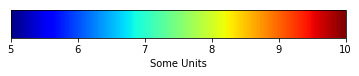

In [122]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

In [29]:
dir(mpl.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_generate_cmap',
 '_reverse_cma

In [5]:
# Run plotting function to generate tables